# 1. Import Libraries

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix


# 2. Import a Data-Set

In [38]:
sn_file_name = "/content/drive/MyDrive/Data analytics course/Social_Network_Ads.csv"
sn_df = pd.read_csv(sn_file_name)
sn_df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**#2**

In [39]:
sn_df["Gender"] = sn_df["Gender"].map({"Male": 1, "Female": 0})

In [ ]:
sn_df

For exploration purpose - let's re-create Linear Regression and see - how it been trained.

In [40]:
#X
independant_var = sn_df.iloc[:, 1:4].values

#y
dependant_var = sn_df.iloc[:, -1].values

**#2**

In [ ]:
independant_var

In [ ]:
dependant_var

#3. Feature Scaling

Now, we can do our feature scaling.

In [43]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
independant_var = sc_X.fit_transform(independant_var)

# 4. Split Data-Set into Training and Test sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(independant_var, dependant_var, test_size = 0.25, random_state = 0)

# 5. Training of Machine Learning Model

In [45]:
dtr_model = DecisionTreeClassifier(criterion="gini")
dtr_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# 6. Run a Prediction

In [46]:
print(dtr_model.predict(sc_X.transform([[1, 36, 80000]])))

[0]


In [47]:
y_pred = dtr_model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [48]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[63  5]
 [ 4 28]]


Thus in binary classification: 

the count of true negatives is C{0,0}, false negatives is C{1,0}, 

false positives is C{0,1} and true positives is C{1,1}.

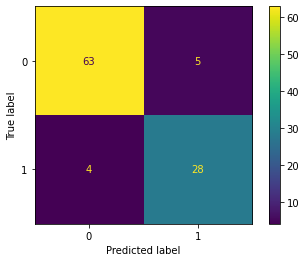

In [49]:
plot_confusion_matrix(dtr_model, X_test, y_test) 

In [50]:
accuracy_score(y_test, y_pred)*100

91.0